### 1.建立数据集

In [18]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F

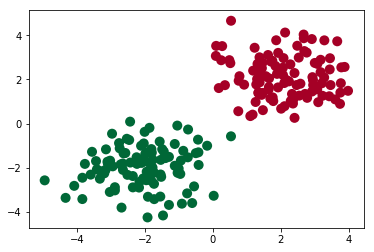

In [19]:
# 假数据
n_data = torch.ones(100, 2)   # 数据基本形态
x0 = torch.normal(2*n_data, 1)  # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)        # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)  # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)  # 类型1 y data (tensor), shape=(100, 1)

# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)   # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)  # LongTensor = 64-bit integer
# torch 只能在 Variable 上训练, 所以把它们变成 Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

### 2.建立神经网络
* 建立一个神经网络我们可以直接运用 torch 中的体系. 先定义所有的层属性( __init__() ), 然后再一层层搭建( forward(x) )层于层的关系链接. 这个和我们在前面 regression 的时候的神经网络基本没差. 建立关系的时候, 我们会用到激活函数.

In [20]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        self.output = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))  # 激活函数(隐藏层的线性值)
        x = self.output(x)   # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x
net = Net(n_features=2, n_hidden=10, n_output=2) # 几个类别就几个 output
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=2, bias=True)
)


### 3.训练网络

/home/cdl/.conda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


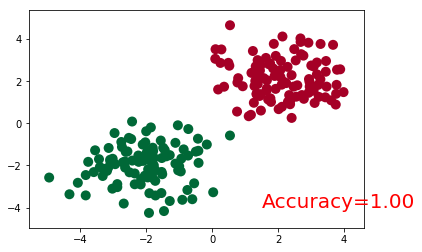

In [23]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)   # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()

for t in range(200):
    out = net(x)  # 喂给 net 训练数据 x, 输出分析值
    loss = loss_func(out, y)  # 计算两者的误差
    optimizer.zero_grad()  # 清空上一步的残余更新参数值
    loss.backward()  # 误差反向传播, 计算参数更新值
    optimizer.step()  # 将参数更新值施加到 net 的 parameters 上
    if t % 2 == 0:
        plt.cla()
         # 最后经过一层softmax的激活函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
plt.ioff()
plt.show();